# Exercise 5B - Parallelization

Introduced in Tutorial 5.

The purpose of this exercise is to show you how code execution can be done in parallel, and the rates it can speed processes up.

### Colour codes

<span style="color:orange;"> Orange text is for emphasis and definitions </span>

<span style="color:lime;"> Green text is for tasks to be completed by the student </span>

<span style="color:dodgerblue;"> Blue text is for Python coding tricks and references </span>

## Load all the necessary Python packages
All packages should work with Conda environment if installed on your machine. Otherwise all necessary packages can be installed in a virtual environment (.venv) in VS Code using: Ctrl+Shift+P > Python: Create Environment > Venv > Python 3.12.x > requirements.txt


In [1]:
import matplotlib.pyplot as plt
from multiprocessing import Pool
import os
import time

## 1. Execution in series

We will begin with an example discussed in class - Calculating the squares of the first million integers.

### 1.1 Import the functions

Two simple functions have been written to do this: *square* and *slow_square* which will be discussed later in this notebook. These are included in the file *src/square.py*. 

<span style="color:orange;">NOTE: To run a function in parallel inside a Jupyter Notebook, it needs to be in a separate .py file.</span>

In [2]:
from src.square import square, slow_square

Testing them out:

In [3]:
test_array = [1, 3, 5, 10]

print (f"The squares of the values {test_array} are:")
values = [] # initialize a list to store the results
for i in test_array:
    values.append(square(i))
print (values)


The squares of the values [1, 3, 5, 10] are:
[1, 9, 25, 100]


### 1.2 Execution in a for loop

Perform the calculation one-at-a-time using a standard for loop.

We will also record how long the calculation takes. 

<span style="color:dodgerblue;">This can be done using the standard library *time* module. To do this, you can record the time before executing the operation (*t<sub>0</sub>*) and after executing the operation (*t<sub>1</sub>*). This method is often used to help spot bottlenecks in code and improve optimization. This method is also used to time how long an EnergyPlus simulation takes.</span>

In [4]:
n = 1000000 # number of iterations

values = [] # initialize a list to store the results

t0 = time.time()
for i in range(n):
    values.append(square(i))
t1 = time.time()
t_series = (t1 - t0)

print (f"The time it took was {t_series:.4f} seconds")

The time it took was 0.1164 seconds


## 2. Execution in parallel

Next, we will execute the same problem in parallel. For this we will use the Python standard library package <span style="color:orange;"> multiprocessing </span> to achieve this. The <span style="color:orange;">multiprocessing.Pool</span> method will generate a pool of workers for which simulations will be assigned. From there we will use the <span style="color:orange;">starmap </span> method to run the square function in parallel.

<span style="color:dodgerblue;">Note that there are many ways to do parallelization in Python (eg. threading module). Parallelization and multi-threading is one of Python's inherent weaknesses - especially when compared with low-level languages like C or Fortran.</span>

We will begin by using 2 processors in parallel and gradually increasing to the max on your machine.

<span style="color:limegreen;"> Before you begin, predict how much faster you expect using multiple processors to be based on your understanding of Amdahl's law</span>

![Amdahls Law](src/images/Amdahls_Law.png)

### 2.1 Using 2 processors

In [5]:
# First we need to determine the numnber of CPU's or processors we want to use.
# We will begin by using just 2 processors
n_processors = 2

# Create a list of inputs to the function.
inputs = list(range(n))

t0 = time.time()
if __name__ == "__main__":
    with Pool(processes = n_processors) as pool:
        returnValues = pool.map(square, inputs)
t1 = time.time()
t_parallel2 = (t1 - t0)

print (f"The time it took was {t_parallel2:.4f} seconds")

The time it took was 0.1370 seconds


### 2.2 Using 3 processors

In [6]:
n_processors = 3

t0 = time.time()
if __name__ == "__main__":
    with Pool(processes = n_processors) as pool:
        returnValues = pool.map(square, inputs)
t1 = time.time()
t_parallel3 = (t1 - t0)

print (f"The time it took was {t_parallel3:.4f} seconds")

The time it took was 0.1379 seconds


### 2.3 Using 4 processors

In [10]:
n_processors = 4

t0 = time.time()
if __name__ == "__main__":
    with Pool(processes = n_processors) as pool:
        returnValues = pool.map(square, inputs)
t1 = time.time()
t_parallel4 = (t1 - t0)

print (f"The time it took was {t_parallel4:.4f} seconds")

The time it took was 0.1360 seconds


### 2.4 Using 6 processors

In [11]:
n_processors = 6

t0 = time.time()
if __name__ == "__main__":
    with Pool(processes = n_processors) as pool:
        returnValues = pool.map(square, inputs)
t1 = time.time()
t_parallel6 = (t1 - t0)

print (f"The time it took was {t_parallel6:.4f} seconds")

The time it took was 0.1569 seconds


### 2.5 Using all processors on your machine

In [12]:
# This function access your operating system data for the number of cpu on your machine
n_processors = os.cpu_count()

t0 = time.time()
if __name__ == "__main__":
    with Pool(processes = n_processors) as pool:
        returnValues = pool.map(square, inputs)
t1 = time.time()
t_parallelAll = (t1 - t0)

print (f"The time it took was {t_parallelAll:.4f} seconds")

The time it took was 0.1844 seconds


## 3. Performance Analysis

Draw a quick bar graph to compare performance

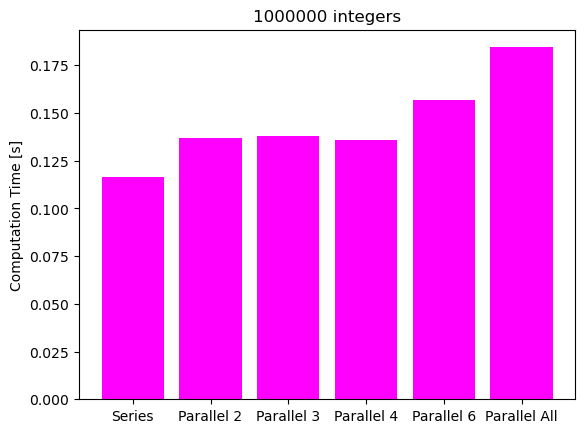

In [13]:
# Create lists of labels and their values for the bar graph
labels = ["Series", "Parallel 2", "Parallel 3", "Parallel 4", "Parallel 6", "Parallel All"]
values = [t_series, t_parallel2, t_parallel3, t_parallel4, t_parallel6, t_parallelAll]

fig, ax = plt.subplots()

# Draw the bar graph for computational time
ax.bar(labels, values, color = "magenta")
ax.set_ylabel("Computation Time [s]")

ax.set_title (f"{n} integers")

plt.show()


The results will vary depending on the specs of your computer and may vary each time your run the code.

**<span style="color:limegreen;">Test your Understanding</span>**

* <span style="color:lime;">Are the results in alignment with your expectations of Amdahl's Law? </span>
* <span style="color:lime;">Can you explain any contradictions with Amdahl's Law? </span>


## 4. Execution with the 'Slow Square' Function

Let's try to do the same exercise again, but use a different function called *slow_square* instead of the *square* function. This function is identical except it does some unnecessary calculations each time it is called - slowing it down.

### 4.1 Execution in Series

In [14]:
# First do the loop in series
values = [] # initialize a list to store the results

t0 = time.time()
for i in range(n):
    values.append(slow_square(i))
t1 = time.time()
t_series = (t1 - t0)

print (f"The time it took in series was {t_series:.4f} seconds")


The time it took in series was 2.2699 seconds


### 4.2 Execution in Parallel

In [15]:
n_processors = 2

# Create a list of inputs to the function.
inputs = list(range(1, n+1))

t0 = time.time()
if __name__ == "__main__":
    with Pool(processes = n_processors) as pool:
        returnValues = pool.map(slow_square, inputs)
t1 = time.time()
t_parallel2 = (t1 - t0)

print (f"The time it took with 2 processors was {t_parallel2:.4f} seconds")


n_processors = 3

t0 = time.time()
if __name__ == "__main__":
    with Pool(processes = n_processors) as pool:
        returnValues = pool.map(slow_square, inputs)
t1 = time.time()
t_parallel3 = (t1 - t0)

print (f"The time it took with 3 processors was {t_parallel3:.4f} seconds")


n_processors = 4

t0 = time.time()
if __name__ == "__main__":
    with Pool(processes = n_processors) as pool:
        returnValues = pool.map(square, inputs)
t1 = time.time()
t_parallel4 = (t1 - t0)

print (f"The time it took with 4 processors was {t_parallel4:.4f} seconds")


n_processors = 6

t0 = time.time()
if __name__ == "__main__":
    with Pool(processes = n_processors) as pool:
        returnValues = pool.map(square, inputs)
t1 = time.time()
t_parallel6 = (t1 - t0)

print (f"The time it took with 6 processors was {t_parallel6:.4f} seconds")


# This function access your operating system data for the number of cpu on your machine
n_processors = os.cpu_count()

t0 = time.time()
if __name__ == "__main__":
    with Pool(processes = n_processors) as pool:
        returnValues = pool.map(square, inputs)
t1 = time.time()
t_parallelAll = (t1 - t0)

print (f"The time it took with all processors was {t_parallelAll:.4f} seconds")

The time it took with 2 processors was 1.3538 seconds
The time it took with 3 processors was 0.9517 seconds
The time it took with 4 processors was 0.1398 seconds
The time it took with 6 processors was 0.1481 seconds
The time it took with all processors was 0.1572 seconds


### 4.2 Performance Analysis

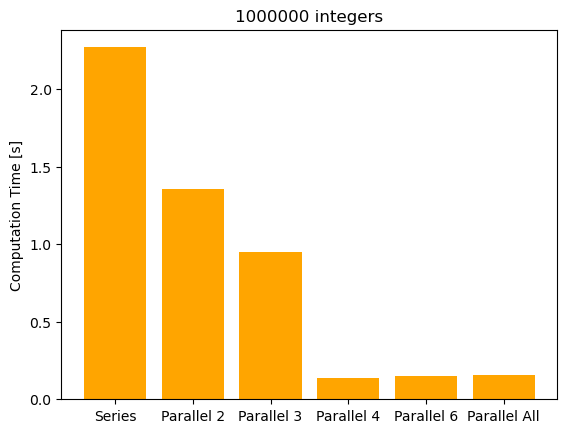

In [16]:
# Create lists of labels and their values for the bar graph
labels = ["Series", "Parallel 2", "Parallel 3", "Parallel 4", "Parallel 6", "Parallel All"]
values = [t_series, t_parallel2, t_parallel3, t_parallel4, t_parallel6, t_parallelAll]

fig, ax = plt.subplots()

# Draw the bar graph for computational time
ax.bar(labels, values, color = "orange")
ax.set_ylabel("Computation Time [s]")

ax.set_title (f"{n} integers")

plt.show()

Once again, the results will vary depending on the specs of your computer and may vary each time your run the code.

**<span style="color:limegreen;">Test your Understanding</span>**

* <span style="color:lime;">Are the results in alignment with your expectations of Amdahl's Law? </span>

<span style="color:dodgerblue;">Every time we use parallelization in Python there is overhead to set up the inter-process communication between processors. For a quick calculation like the *square* function, this overhead does not rationalize parallelization. But for longer calculations like the *slow_square* function or for energyPlus simulations, the overhead cost diminishes proportionately.</span>